<a href="https://colab.research.google.com/github/ssk1177/Predictive-Analytics/blob/main/Breast_Cancer_Wisconsin_(Diagnostic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ReadMe**:

The **objective** is to predict whether or not a patient has the breast cancer based on the diagnostic measurements.

**Dataset**: Breast Cancer Wisconsin (Diagnostic)

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic



# Table of contents <a class="anchor" id="toc"></a>

* [Loading packages](#packages)
* [Functional blocks](#functional_blocks)
* [Load the dataset](#load_dataset)
* [Explore the dataset features](#explore_features)
    * [Explore the target - get the target correlation with the features](#explore_target)
    * [Check for missing values  &emsp;&emsp; &nbsp; __Action__: handle missing values (if any)](#missing_values)
    * [Check for duplicate values  &emsp; &nbsp; __Action__: remove duplicate values (if any)](#remove_duplicates)
    * [Check for outliers &emsp; &emsp; &emsp; &emsp;&nbsp; &nbsp;__Action__: Remove outliers (if any)](#remove_outliers)
        __[Future work - This step can be Performed Only for Selected Features (after step-6)]__ <br>
    * [Check for features distribution (biases) &emsp; __Action__: Correct biases](#correct_biases)
        __[Future work - This step can be Performed Only for Selected Features (after step-6)]__ <br>
        
* [Split the dataset to train and test data](#split_dataset)

* [Scale the train and test data - use min-max scaler](#scale_data)

* [Classifier: KNN](#classifier_knn)
    * [Train the KNN with all the features](#train_knn_all_feats)
        * [Print the Metrices (Accuracy, Precision and Recall)](#print_knn_mat_all)
        * [Plot Confusion Matrix](#plot_knn_conf_mat_all)
        * [Classification report](#plot_knn_class_rep_all)
        * [Print the Time taken for model training and testing](#knn_time_all)
        
    * [Select the best features using the 'SequentialFeatureSelector'for KNN classifier](#train_knn_select_best_feats)
        * [Train the KNN Classifier with the selected features](#train_knn_select_feats)
        * [Make predictions on the test data using trained classifier](#predict_knn_select_feats)
        * [Print the Metrices (Accuracy, Precision and Recall)](#print_knn_mat_select)
        * [Plot Confusion Matrix](#plot_knn_conf_mat_select)
        * [Classification report](#plot_knn_class_rep_select)
        * [Print the Time taken for model training and testing](#knn_time_select)
        
    * [KNN's K-paramter tuning](#hyper_param_tuning)
        * [Retrain with the Tuned k-parameter](#retrain_with_knn)
        * [Make predictions on the test data using trained classifier](#predict_knn_select_feats_K)
        * [Print the Metrices (Accuracy, Precision and Recall)](#print_knn_mat_select_K)
        * [Plot Confusion Matrix](#plot_knn_conf_mat_select_K)
        * [Classification report](#plot_knn_class_rep_select_K)
        * [Print the Time taken for model training and testing](#knn_time_select_K)
        
* [Classifier: Naive Bayes](#classifier_nb)
        
    * [Train the Naive Bayes with all the features](#train_nb_all_feats)
        * [Print the Metrices (Accuracy, Precision and Recall)](#print_nb_mat_all)
        * [Plot Confusion Matrix](#plot_nb_conf_mat_all)
        * [Classification report](#plot_nb_class_rep_all)
        * [Print the Time taken for model training and testing](#nb_time_all)

    * [Select the best features using the 'SequentialFeatureSelector'for NB classifier](#select_best_feats_nb)
        * [Train the NB Classifier with the selected features](#train_nb_select_feats)
        * [Make predictions on the test data using trained classifier](#predict_nb_select_feats)
        * [Print the Metrices (Accuracy, Precision and Recall)](#print_nb_mat_select)
        * [Plot Confusion Matrix](#plot_nb_conf_mat_select)
        * [Classification report](#plot_nb_class_rep_select)
        * [Print the Time taken for model training and testing](#nb_time_select)

* [Summary](#summary)


# Loading Packages <a class="anchor" id="packages"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

import pandas as pd
import numpy as np
import seaborn as sns
import time
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
PALETTE = "Blues"

### Functional blocks <a class="anchor" id="functional_blocks"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
def plot_features_dist(df, features):
    plt.figure(figsize=(15,50))
    i = 1

    skewness_dict = {}

    for col in features:
        if(col != 'target'):
            plt.subplot(11, 3, i)
            sns.histplot(data = df, x=col, hue="target", kde=True, stat="percent", legend=False)
            plt.legend(title='Target', loc='upper right', labels=['Malignant', 'Benign'])
            skewness_dict[col] = skew(df[col])
            i = i+1

    plt.tight_layout()
    plt.show()

def run_classifier(clf, X_train_scaled, y_train):
    match clf:
        case "NB":
            # Get the GaussianNB classifier with default parameters
            gnb = GaussianNB()

            # Mark the start time for training
            train_time_start =time.time()

            # Fit the train data
            gnb.fit(X_train_scaled, y_train)

            # Mark the end time for training
            train_time_end =time.time()

            # Mark the start time for testing
            test_time_start =time.time()

            # Predict the test data
            y_pred = gnb.predict(X_test_scaled)

            # Mark the end time for testing
            test_time_end =time.time()

        case "KNN":
            # Get the KNN classifier with default parameters (such as k = 5)
            knn = KNeighborsClassifier()

            # Mark the start time for training
            train_time_start =time.time()

            # Fit the train data
            knn.fit(X_train_scaled, y_train)

            # Mark the end time for training
            train_time_end =time.time()

            # Mark the start time for testing
            test_time_start =time.time()

            # Predict the test data
            y_pred = knn.predict(X_test_scaled)

            # Mark the end time for testing
            test_time_end =time.time()

    return train_time_start, train_time_end, test_time_start, test_time_end, y_pred

### Steps to be performed: <br>
1. Load the dataset

2. Explore the dataset features <br>
    2.1. Explore the target - get the target correlation with the features <br>
    2.2. Check for missing values  &emsp;&emsp; &nbsp; __Action__: handle missing values (if any) <br>
    2.3. Check for duplicate values  &emsp; &nbsp; __Action__: remove duplicate values (if any) <br>
    2.4. Check for outliers &emsp; &emsp; &emsp; &emsp;&nbsp; &nbsp;__Action__: Remove outliers (if any) __[This step can be Performed Only for Selected Features (after step-6)]__ <br>
    2.5. Check for features distribution (biases) &emsp; __Action__: Correct biases __[This step can be Performed Only for Selected Features (after step-6)]__ <br>
    
3. Split the dataset to train and test data

4. Scale the train and test data - use min-max scaler

5. As per the Lab-2 requirement, train the KNN and Naive Bayes with all the features.

    5.1. Train the KNN with all the features
        5.1.1. Print the Metrices (Accuracy, Precision and Recall)
        5.1.2. Plot Confusion Matrix
        5.1.3. Classification report
        5.1.4. Print the Time taken for model training and testing
        
    5.2. Train the Naive Bayes with all the features
        5.2.1. Print the Metrices (Accuracy, Precision and Recall)
        5.2.2. Plot Confusion Matrix
        5.2.3. Classification report
        5.2.4. Print the Time taken for model training and testing
        
6. Train the KNN and Naive Bayes with the best selected features using the 'SequentialFeatureSelector' <br>
    6.1. Select the best features using the 'SequentialFeatureSelector'for KNN classifier
        6.1.1. Train the KNN Classifier with the selected features
        6.1.2. Make predictions on the test data using trained classifier
        6.1.3. Print the Metrices (Accuracy, Precision and Recall)
        6.1.4. Plot Confusion Matrix
        6.1.5. Classification report
        6.1.6. Print the Time taken for model training and testing

    6.2. Select the best features using the 'SequentialFeatureSelector'for NB classifier
        6.2.1. Train the NB Classifier with the selected features
        6.2.2. Make predictions on the test data using trained classifier
        6.2.3. Print the Metrices (Accuracy, Precision and Recall)
        6.2.4. Plot Confusion Matrix
        6.2.5. Classification report
        6.2.6. Print the Time taken for model training and testing

7. Compare the models generated in step-5 and step-7: <br>
    7.1. Classification report <br>
    7.2. Confusion matrix <br>
    7.3. Accuracy measures <br>
    7.4. Execution times for model training and testing

## Step-1: Load the data <a class="anchor" id="load_dataset"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
# fetch dataset
data = load_breast_cancer(as_frame=True)

X = pd.DataFrame(data = data.data)
y = pd.DataFrame(data = data.target)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Step-2: Explore the dataset features <a class="anchor" id="explore_features"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

### Step-2.1: Explore target <a class="anchor" id="explore_target"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

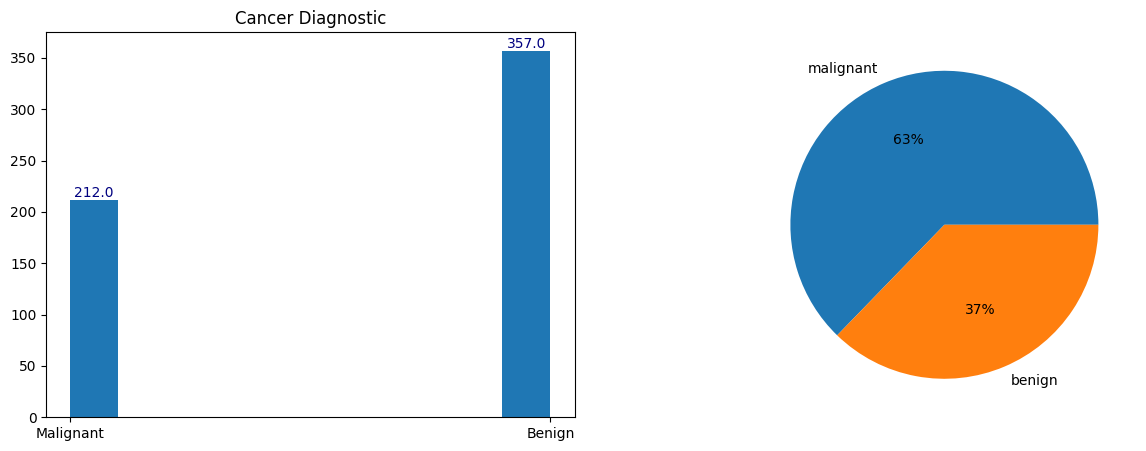

In [ ]:
# Plot the target graph
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)

values, bins, bars = plt.hist(y.target)
plt.bar_label(bars, fontsize=10, color='navy', fmt=lambda x: x if x > 0 else '')
plt.title("Cancer Diagnostic")
plt.xticks(np.arange(2), ('Malignant', 'Benign'))

# Create a pie chart- to show percentage
plt.subplot(1, 2, 2)
plt.pie (y.target.value_counts(), labels=data.target_names, autopct='%1.0f%%')

#plt.tight_layout()
plt.show()


### Observation:
The 'Malignant' class label is close to 65% of the 'benign' class label, though the classes are not balanced but still the difference is not that significant.

#### Target Correlation with the features
Exploration of the features that exhibit higher correlations with target variable

In [ ]:
df = pd.concat([X,y], axis=1)

temp = df.copy()

TargetCorreltions = temp.corr()['target'].sort_values(ascending = False)[1:]
TargetCorreltions[::-1].head(15).to_frame()

,target
worst concave points,-0.793566
worst perimeter,-0.782914
mean concave points,-0.776614
worst radius,-0.776454
mean perimeter,-0.742636
worst area,-0.733825
mean radius,-0.730029
mean area,-0.708984
mean concavity,-0.696360
worst concavity,-0.659610


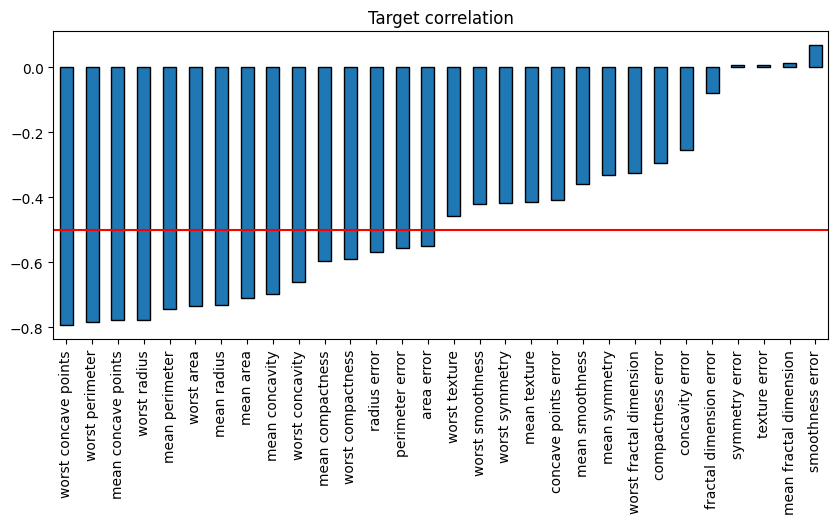

In [ ]:
TargetCorreltions[::-1].plot(kind = 'bar',
                            edgecolor = 'k',
                            figsize = (10, 4))
plt.axhline(-0.5, c = 'r')
plt.grid(False)
plt.title("Target correlation");

### Observation:
From the above chart, it's observed that most of the features are negatively correlated with the target.The red line indicate the 50% (or 0.5).

## Step-2.2: Check for missing values <a class="anchor" id="missing_values"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
X.isnull().sum() / len(X) * 100

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
dtype: float64

## Observataion:
No Missing values are observed in the dataset

## Step-2.3: Check for duplicate values <a class="anchor" id="remove_duplicates"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
X.duplicated().sum()

0

#### Obseravation: There are no duplicate values observed in the data.

### Step-3: Split the dataset to train and test data <a class="anchor" id="split_dataset"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=117)

Setting ‘stratify’ to y makes our training split represent the proportion of each value in the y variable. For example, in our dataset, if 25% of patients have Malignant and 75% Benign, setting ‘stratify’ to y will ensure that the random split has 25% of patients Malignant and 75% of patients Benign.

### Step-4: Feature Scaling <a class="anchor" id="scale_data"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>
Scale the features using min-max scaler

In [ ]:
# Used min-max scaler
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

### Classifier: KNN <a class="anchor" id="classifier_knn"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

### Step-5.1: Train the KNN with all the features. <a class="anchor" id="train_knn_all_feats"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
knn_train_time_start, knn_train_time_end, knn_test_time_start, knn_test_time_end, y_pred = run_classifier("KNN", X_train_scaled, y_train)

### Step-5.1.1: Print the Metrices (Accuracy, Precision and Recall) <a class="anchor" id="print_knn_mat_all"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", recall)

Accuracy: 0.9649
Precision: 0.9474
Recall: 1.0


### Step-5.1.2: Plot Confusion Matrix <a class="anchor" id="plot_knn_conf_mat_all"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

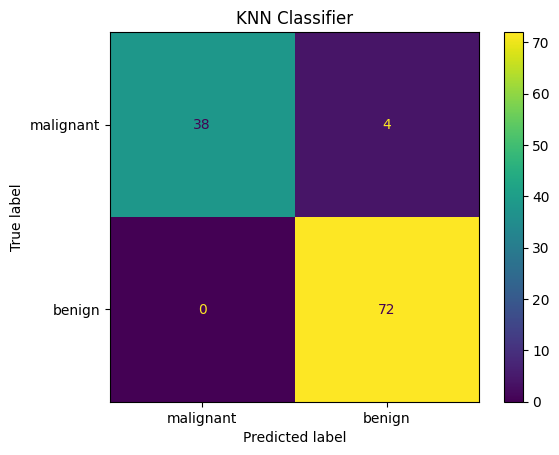

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot()
plt.title('KNN Classifier')
plt.show()

### Step-5.1.3. Classification report <a class="anchor" id="plot_knn_class_rep_all"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        42
      benign       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### Step-5.1.4. Print the Time taken for model training and testing <a class="anchor" id="knn_time_all"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print("Time taken by KNN-classifier for training is: ", round(knn_train_time_end - knn_train_time_start, 4), "secs")
print("Time taken by KNN-classifier for testing is: ", round(knn_test_time_end - knn_test_time_start, 4), "secs")

Time taken by KNN-classifier for training is:  0.0044 secs
Time taken by KNN-classifier for testing is:  0.015 secs


### Select the best features using the 'SequentialFeatureSelector'for KNN classifier <a class="anchor" id="select_best_feats_knn"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
# nearset neighbors
knn = KNeighborsClassifier()

# Forward selection
tic =time.time()
sfs = SequentialFeatureSelector(knn, n_features_to_select=5, direction='forward')
sfs.fit(X_train, y_train)
toc= time.time()
features = feature_names[sfs.get_support()]

print("KNN Classifier")
print(f"Top 5 features:{features}")
print(f"Forward selection took {round(toc-tic, 2)} seconds")

KNN Classifier
Top 5 features:['mean smoothness' 'perimeter error' 'worst radius' 'worst texture'
 'worst concavity']
Forward selection took 8.48 seconds


### Train the KNN Classifier with the selected features <a class="anchor" id="train_knn_select_best_feats"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
# train the knn model with the selected features
start_train_time_knns = time.time()

knn.fit(sfs.transform(X_train), y_train)

end_train_time_knns = time.time()

### Make predictions on the test data using trained classifier <a class="anchor" id="predict_knn_select_feats"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
start_test_time_knns = time.time()

yhat = knn.predict(sfs.transform(X_test))

end_test_time_knns = time.time()

### Print the Metrices (Train and Test Accuracy) <a class="anchor" id="print_knn_mat_select"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print(f"Train accuracy: {knn.score(sfs.transform(X_train), y_train):.3f}")
print(f"Test accuracy: {knn.score(sfs.transform(X_test), y_test):.3f}")

Train accuracy: 0.954
Test accuracy: 0.921


### Plot Confusion Matrix <a class="anchor" id="plot_knn_conf_mat_select"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>


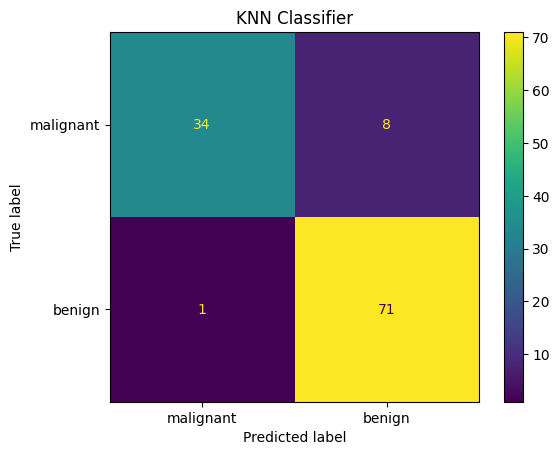

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot()
plt.title('KNN Classifier')
plt.show()

### Classification report <a class="anchor" id="plot_knn_class_rep_select"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        42
      benign       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### Print the Time taken for model training and testing <a class="anchor" id="knn_time_select"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print("Time taken by KNN-classifier for training is: ", round(end_train_time_knns - start_train_time_knns, 4), "secs")
print("Time taken by KNN-classifier for testing is: ", round(end_test_time_knns - start_test_time_knns, 4), "secs")

Time taken by KNN-classifier for training is:  0.0043 secs
Time taken by KNN-classifier for testing is:  0.0106 secs


### Hyperparameter tuning: KNN's K-Parameter Tuning <a class="anchor" id="hyper_param_tuning"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Cross validation is the standard approach here, but let's experiment with the accuracy this time
    # score = cross_val_score(knn, X_train, y_train, cv=5)

    knn.fit(sfs.transform(X_train), y_train)
    score = accuracy_score(y_test, knn.predict(sfs.transform(X_test)))

    scores.append(np.mean(score))

Best value of k: 6


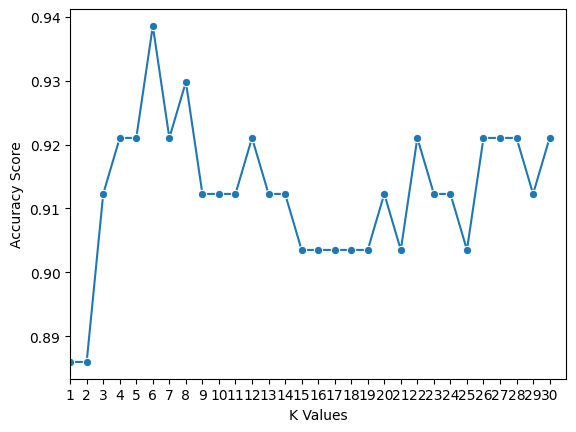

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x = k_values, y = scores, marker = 'o')

ax.set_xlim(1,31)
ax.set_xticks(range(1,31))

plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# Get k corresponding to max value of score
best_k = k_values[scores.index(max(scores))]
print("Best value of k:", best_k)

In [ ]:
from IPython.display import Markdown as md

md("#### Observation:: <br><br> From the above chart, we can observe that for values k= {}, the accuracy is the highest. so lets retrain our model with the value of k set to {}.".format(best_k, best_k))

#### Observation:: <br><br> From the above chart, we can observe that for values k= 6, the accuracy is the highest. so lets retrain our model with the value of k set to 6.

### Retrain with the Tuned k-parameter <a class="anchor" id="retrain_with_knn"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)

start_train_time_knns_k = time.time()

knn.fit(sfs.transform(X_train), y_train)

end_train_time_knns_k = time.time()

### Make predictions on the test data using trained classifier <a class="anchor" id="predict_knn_select_feats_k"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
start_test_time_knns_k = time.time()

yhat = knn.predict(sfs.transform(X_test))

end_test_time_knns_k = time.time()

### Print the Metrices (Train and Test Accuracy) <a class="anchor" id="print_knn_mat_select_k"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print(f"Train accuracy: {knn.score(sfs.transform(X_train), y_train):.3f}")
print(f"Test accuracy: {knn.score(sfs.transform(X_test), y_test):.3f}")

Train accuracy: 0.956
Test accuracy: 0.939


### Plot Confusion Matrix <a class="anchor" id="plot_knn_conf_mat_select_k"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

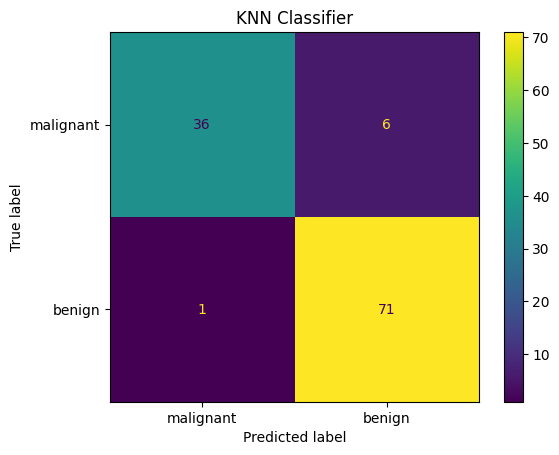

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot()
plt.title('KNN Classifier')
plt.show()

### Classification report <a class="anchor" id="plot_knn_class_rep_select_k"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        42
      benign       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



### Print the Time taken for model training and testing <a class="anchor" id="knn_time_select_k"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print("Time taken by KNN-classifier for training is: ", round(end_train_time_knns_k - start_train_time_knns_k, 4), "secs")
print("Time taken by KNN-classifier for testing is: ", round(end_test_time_knns_k - start_test_time_knns_k, 4), "secs")

Time taken by KNN-classifier for training is:  0.0047 secs
Time taken by KNN-classifier for testing is:  0.0138 secs


### Classifier: NB <a class="anchor" id="classifier_nb"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

### Train the Naive Bayes with all the features <a class="anchor" id="train_nb_all_feats"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
gnb_train_time_start, gnb_train_time_end, gnb_test_time_start, gnb_test_time_end, y_pred = run_classifier("NB", X_train_scaled, y_train)

 ### Print the Metrices (Accuracy, Precision and Recall) <a class="anchor" id="print_nb_mat_all"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall))

Accuracy: 0.9474
Precision: 0.9459
Recall: 1


### Plot Confusion Matrix <a class="anchor" id="plot_nb_conf_mat_all"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

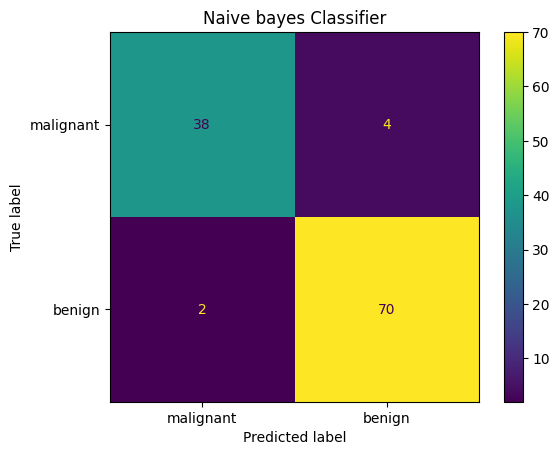

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot()
plt.title('Naive bayes Classifier')
plt.show()

### Classification report <a class="anchor" id="plot_nb_class_rep_all"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        42
      benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Print the Time taken for model training and testing <a class="anchor" id="nb_time_all"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print("Time taken by NB-classifier for training is: ", round(gnb_train_time_end - gnb_train_time_start, 4), "secs")
print("Time taken by NB-classifier for testing is: ", round(gnb_test_time_end - gnb_test_time_start, 4), "secs")

Time taken by NB-classifier for training is:  0.0046 secs
Time taken by NB-classifier for testing is:  0.0007 secs


### Select the best features using the 'SequentialFeatureSelector'for NB classifier <a class="anchor" id="select_best_feats_nb"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
gnb = GaussianNB()

# Forward selection
tic =time.time()
sfs = SequentialFeatureSelector(gnb, n_features_to_select=5, direction='forward')
sfs.fit(X_train, y_train)
toc= time.time()
features = feature_names[sfs.get_support()]
print("Naive Bayes Classifier")
print(f"Top 5 features with SFS forward:{features}")
print(f"Forward selection took {toc-tic} seconds")

Naive Bayes Classifier
Top 5 features with SFS forward:['mean fractal dimension' 'texture error' 'worst texture'
 'worst perimeter' 'worst smoothness']
Forward selection took 4.759461402893066 seconds


### Train the NB Classifier with the selected features <a class="anchor" id="train_nb_select_feats"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
# train the model

start_train_time_nbs = time.time()

gnb.fit(sfs.transform(X_train), y_train)

end_train_time_nbs = time.time()

### Make predictions on the test data using trained classifier <a class="anchor" id="predict_nb_select_feats"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
start_test_time_nbs = time.time()

yhat = gnb.predict(sfs.transform(X_test))

end_test_time_nbs = time.time()

### Print the Metrices (Accuracy, Precision and Recall) <a class="anchor" id="print_nb_mat_select"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print(f"Train accuracy: {gnb.score(sfs.transform(X_train), y_train):.3f}")
print(f"Test accuracy: {gnb.score(sfs.transform(X_test), y_test):.3f}")

Train accuracy: 0.974
Test accuracy: 0.939


### Plot Confusion Matrix <a class="anchor" id="plot_nb_conf_mat_select"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

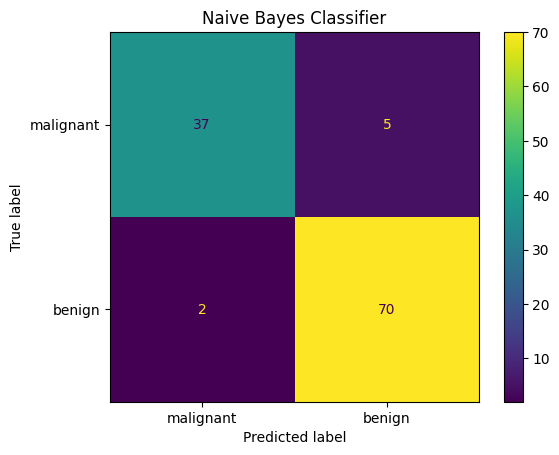

In [ ]:
cm = confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot()
plt.title('Naive Bayes Classifier')
plt.show()

### Classification report <a class="anchor" id="plot_nb_class_rep_select"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        42
      benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Print the Time taken for model training and testing <a class="anchor" id="nb_time_select"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

In [ ]:
print("Time taken by NB-classifier for training is: ", round(end_train_time_nbs - start_train_time_nbs, 4), "secs")
print("Time taken by NB-classifier for testing is: ", round(end_test_time_nbs - start_test_time_nbs, 4), "secs")

Time taken by NB-classifier for training is:  0.0087 secs
Time taken by NB-classifier for testing is:  0.0025 secs


### Summary <a class="anchor" id="summary"></a> <p style='text-align: right; font-size: 15px; color:blue; font-weight: bold;'> [Go to Main Menu](#toc) </p>

Compare the models generated in step-5 and step-7: <br>
- Accuracy measures <br>
- Execution times for model training and testing


<table style="height: 448px; width: 956px; border-color: #ff00ff;" border="1">
<tbody>
<tr>
<td style="width: 154px;">&nbsp;</td>
<td style="width: 278.125px;">Features</td>
<td style="width: 192.875px;">Accuracy Measures</td>
<td style="width: 132px;">Feature selection time</td>
<td style="width: 96px;">Training Time</td>
<td style="width: 83px;">Testing Time</td>
</tr>
<tr>
<td style="width: 154px;" rowspan="3">KNN</td>
<td style="width: 278.125px;">
<ul>
<li>All Features</li>
<li>Default Paramaters of KNN</li>
</ul>
</td>
<td style="width: 192.875px;">&nbsp;
<pre>Accuracy: 0.9649
Precision: 0.9474
Recall: 1.0</pre>
</td>
<td style="width: 132px;">N/A</td>
<td style="width: 96px;">&nbsp;
<pre>0.0022 secs</pre>
</td>
<td style="width: 83px;">&nbsp;
<pre>0.0154 secs</pre>
</td>
</tr>
<tr>
<td style="width: 278.125px;">
<ul>
<li>Top 5 selected Features</li>
<ul>
<li>'mean smoothness'</li>
<li>'perimeter error'</li>
<li>'worst radius'</li>
<li>'worst texture'</li>
<li>'worst concavity'</li>
</ul>
</ul>
<ul>
<li>Default Paramaters of KNN</li>
</ul>
</td>
<td style="width: 192.875px;">&nbsp;
<pre>Train accuracy: 0.954
Test accuracy: 0.921</pre>
<pre>&nbsp;</pre>
</td>
<td style="width: 132px;">&nbsp;
<pre>8.32 seconds</pre>
</td>
<td style="width: 96px;">
<pre>0.0048 secs</pre>
&nbsp;</td>
<td style="width: 83px;">&nbsp;
<pre>0.0102 secs</pre>
</td>
</tr>
<tr>
<td style="width: 278.125px;">&nbsp;
<ul>
<li>Top 5 selected Features</li>
<li>With optimized k-value
<ul>
<li>k = 6</li>
</ul>
</li>
</ul>
</td>
<td style="width: 192.875px;">&nbsp;
<pre>Train accuracy: 0.956
Test accuracy: 0.939</pre>
</td>
<td style="width: 132px;">&nbsp;N/A</td>
<td style="width: 96px;">&nbsp;
<pre>0.0045 secs</pre>
</td>
<td style="width: 83px;">&nbsp;
<pre>0.0135 secs</pre>
</td>
</tr>
<tr>
<td style="width: 154px;" rowspan="2">Naive Bayes</td>
<td style="width: 278.125px;">
<ul>
<li>All Features</li>
<li>Default Paramaters of Naive Bayes</li>
</ul>
</td>
<td style="width: 192.875px;">
<pre>Accuracy: 0.9474
Precision: 0.9459
Recall: 1</pre>
&nbsp;</td>
<td style="width: 132px;">N/A</td>
<td style="width: 96px;">
<pre>0.0029 secs</pre>
&nbsp;</td>
<td style="width: 83px;">&nbsp;
<pre>0.0003 secs</pre>
</td>
</tr>
<tr>
<td style="width: 278.125px;">
<ul>
<li>Top 5 selected Features</li>
<ul>
<li>'mean fractal dimension'</li>
<li>'texture error'</li>
<li>'worst texture'</li>
<li>'worst perimeter'</li>
<li>'worst smoothness'</li>
</ul>
</ul>
<ul>
<li>Default Paramaters of&nbsp;Naive Bayes</li>
</ul>
</td>
<td style="width: 192.875px;">
<pre>Train accuracy: 0.974
Test accuracy: 0.939</pre>
&nbsp;</td>
<td style="width: 132px;">
<pre>4.18 seconds</pre>
&nbsp;</td>
<td style="width: 96px;">
<pre>0.0048 secs</pre>
&nbsp;</td>
<td style="width: 83px;">&nbsp;
<pre>0.0102 secs</pre>
</td>
</tr>
</tbody>
</table>